<a href="https://colab.research.google.com/github/qwertyqwertyqwertyqwerty123/colab_projects/blob/main/des_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Импорт библиотек
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from google.colab import drive
drive.mount('/content/drive')

# DIR PATH to DATA
dir_path = "/content/drive/My Drive/"

csv_file_path_1 = dir_path + 'smoking.csv'
csv_file_path_1

Mounted at /content/drive


'/content/drive/My Drive/smoking.csv'

In [ ]:
# Чтение файла
data = pd.read_csv(csv_file_path_1)
print(data.shape)
data.head()

(55692, 27)


,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [ ]:
# Удаление ID
data = data.drop(columns=['ID'])

# Перекодирование нечисловых признаков
data['gender'] = data['gender'].map({'F': 0, 'M': 1})
data['oral'] = data['oral'].map({'Y': 1, 'N': 0})
data['tartar'] = data['tartar'].map({'Y': 1, 'N': 0})

# Выделение целевой и факторов
y = data['smoking']
X = data.drop(columns=['smoking'])

In [ ]:
# Разделение на train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Y_predicted = clf.predict(X_test)

# Вычисление метрик
print('accuracy ', accuracy_score(y_test, Y_predicted))
print('precision ', precision_score(y_test, Y_predicted))
print('recall ', recall_score(y_test, Y_predicted))
print('f1 ', f1_score(y_test, Y_predicted))

accuracy  0.7759224346889307
precision  0.6930243669374104
recall  0.7054961089494164
f1  0.6992046276211136


In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test,Y_predicted)
mse

0.2240775653110692

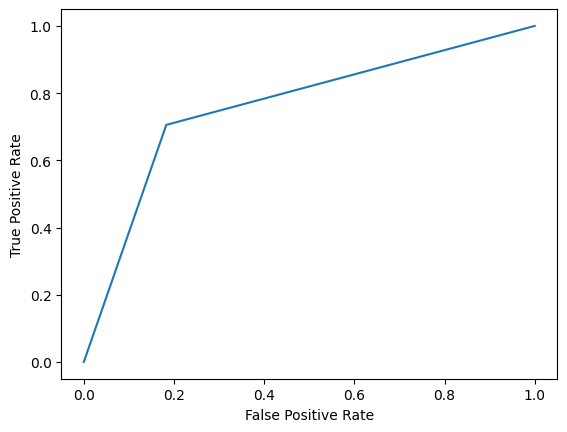

In [ ]:
# Построение графика
import matplotlib.pyplot as plt
import sklearn.metrics

fpr, tpr, _ = sklearn.metrics. roc_curve (y_test, Y_predicted)

#create ROC curve
plt.plot (fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

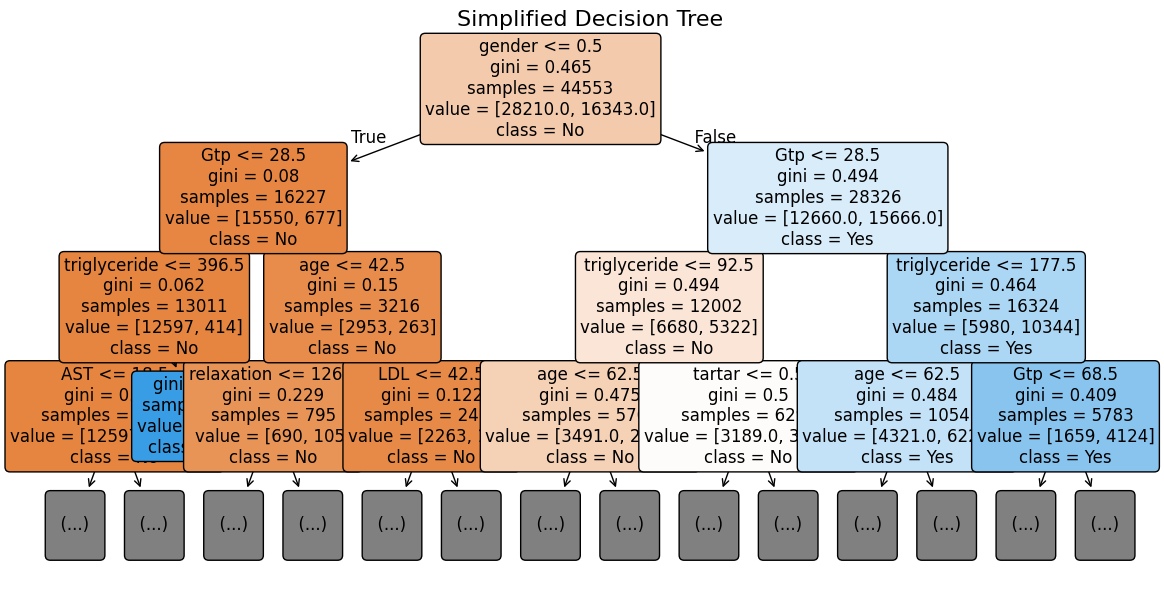

In [ ]:
# Визуализация дерева решений
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plot_tree(clf,
          feature_names=X.columns,
          class_names=['No', 'Yes'],
          filled=True,
          rounded=True,
          fontsize=12,
          max_depth=3)  # Показываем только верхние 3 уровня дерева

plt.title("Simplified Decision Tree", fontsize=16)
plt.tight_layout()
plt.show()

Random Forest Metrics:
Accuracy: 0.8301463327049107
Precision: 0.7587412587412588
Recall: 0.7915856031128404
F1: 0.7748155201142585
MSE: 0.16985366729508933

Bagging Metrics:
Accuracy: 0.8231439087889397
Precision: 0.755
Recall: 0.7711575875486382
F1: 0.7629932627526468
MSE: 0.17685609121106025

Gradient Boosting Metrics:
Accuracy: 0.7795134213125056
Precision: 0.689995410738871
Recall: 0.7312743190661478
F1: 0.7100354191263282
MSE: 0.22048657868749438


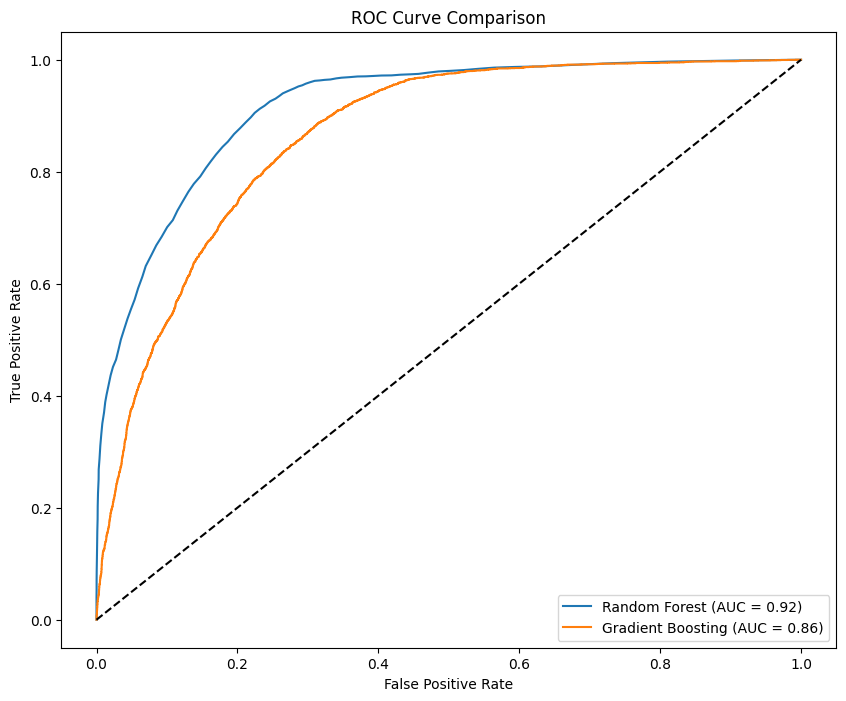

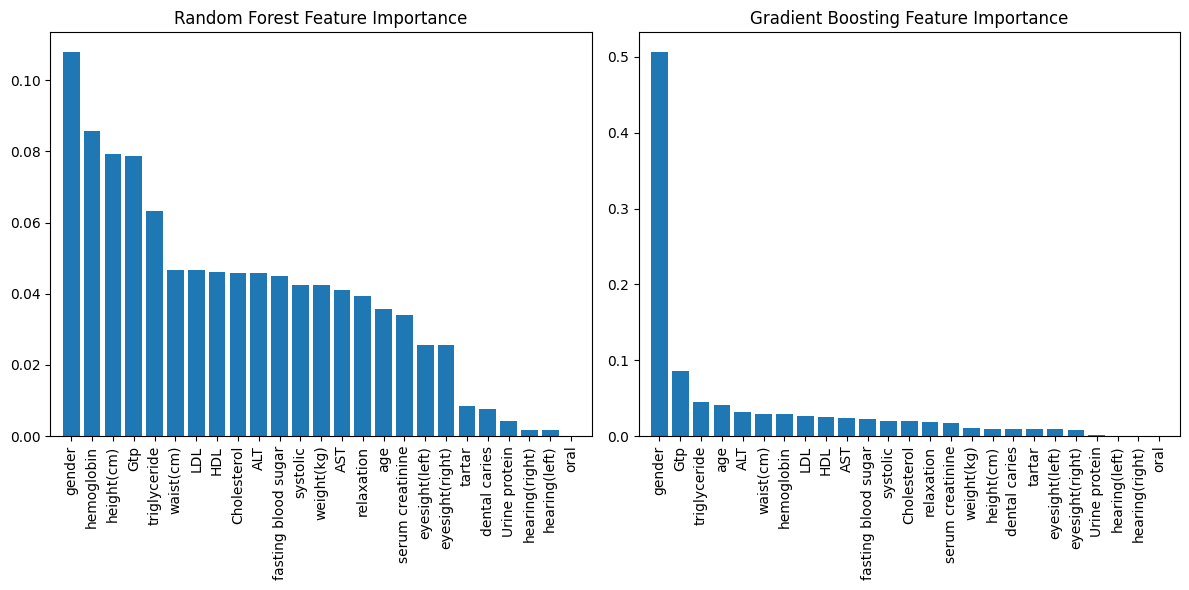

In [ ]:
# Импорт необходимых библиотек
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# 1. Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

# Метрики для Random Forest
print("Random Forest Metrics:")
print('Accuracy:', accuracy_score(y_test, rf_pred))
print('Precision:', precision_score(y_test, rf_pred))
print('Recall:', recall_score(y_test, rf_pred))
print('F1:', f1_score(y_test, rf_pred))
print('MSE:', mean_squared_error(y_test, rf_pred))

# ROC-кривая для Random Forest
rf_probs = rf_clf.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_auc = auc(rf_fpr, rf_tpr)

# 2. Bagging с Decision Tree
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42),
    n_estimators=50,
    random_state=42
)
bag_clf.fit(X_train, y_train)
bag_pred = bag_clf.predict(X_test)

# Метрики для Bagging
print("\nBagging Metrics:")
print('Accuracy:', accuracy_score(y_test, bag_pred))
print('Precision:', precision_score(y_test, bag_pred))
print('Recall:', recall_score(y_test, bag_pred))
print('F1:', f1_score(y_test, bag_pred))
print('MSE:', mean_squared_error(y_test, bag_pred))

# 3. Gradient Boosting
gb_clf = GradientBoostingClassifier(
    n_estimators=200,
    max_depth=8,
    learning_rate=0.03,
    min_samples_leaf=16,
    min_samples_split=16,
    random_state=42
)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)

# Метрики для Gradient Boosting
print("\nGradient Boosting Metrics:")
print('Accuracy:', accuracy_score(y_test, gb_pred))
print('Precision:', precision_score(y_test, gb_pred))
print('Recall:', recall_score(y_test, gb_pred))
print('F1:', f1_score(y_test, gb_pred))
print('MSE:', mean_squared_error(y_test, gb_pred))

# ROC-кривая для Gradient Boosting
gb_probs = gb_clf.predict_proba(X_test)[:, 1]
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)
gb_auc = auc(gb_fpr, gb_tpr)

# Визуализация ROC-кривых
plt.figure(figsize=(10, 8))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(gb_fpr, gb_tpr, label=f'Gradient Boosting (AUC = {gb_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

# Сравнение важности признаков
plt.figure(figsize=(12, 6))

# Важность признаков для Random Forest
plt.subplot(1, 2, 1)
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.title("Random Forest Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])

# Важность признаков для Gradient Boosting
plt.subplot(1, 2, 2)
importances = gb_clf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.title("Gradient Boosting Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])

plt.tight_layout()
plt.show()

Как видно на графике 1 где показан рейт TP и FP, random forest показывает лучий результат. Наибольшее влияние в обоих случаях оказывает переменная gender.